<a href="https://colab.research.google.com/github/shekharkoirala/machinelearning_algorithms_analysis/blob/master/bestfitline/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression analysis**

# **New Section**

**Using sklearn**

**step 1: Download the diabetes data from source**

In [30]:
# download the data
!wget https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv

--2019-02-20 07:33:24--  https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.32K  --.-KB/s    in 0.01s   

2019-02-20 07:33:24 (1.74 MB/s) - ‘diabetes.csv’ saved [23875/23875]



In [31]:
# import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#datatype 1
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)


In [33]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.771


In [34]:
predict = logreg.predict(X_test)
predict

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png)

**Plotting the graph ,  but our data is not in the following format**

**Our data has multiple features and comparing any one of the features with outcomes , we have not dictinctive features as above,**


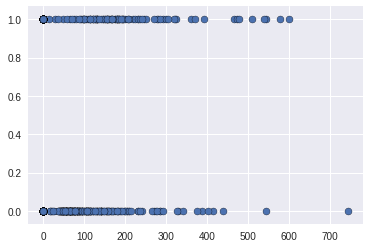

In [35]:
plt.scatter(X_train['Insulin'], y_train, edgecolor='k')
plt.show()

**so lets try PCA to reduce the dimension of dataset , and see , if the features becomes distinctive**

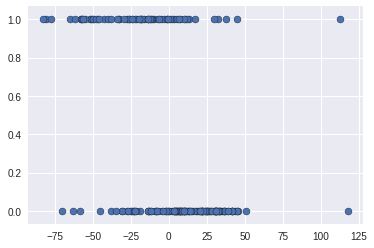

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['data1', 'data2'])

plt.scatter(principalDf['data2'], y_test, edgecolor='k')
# plt.plot(principalDf['data2'], predict, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

**So , the traditional best fit line approach is not suitable in logistic regression , rather than plotting the line, we can  scatter plot it. 
Red plots are valid test data , and blue plots are predicted test data**

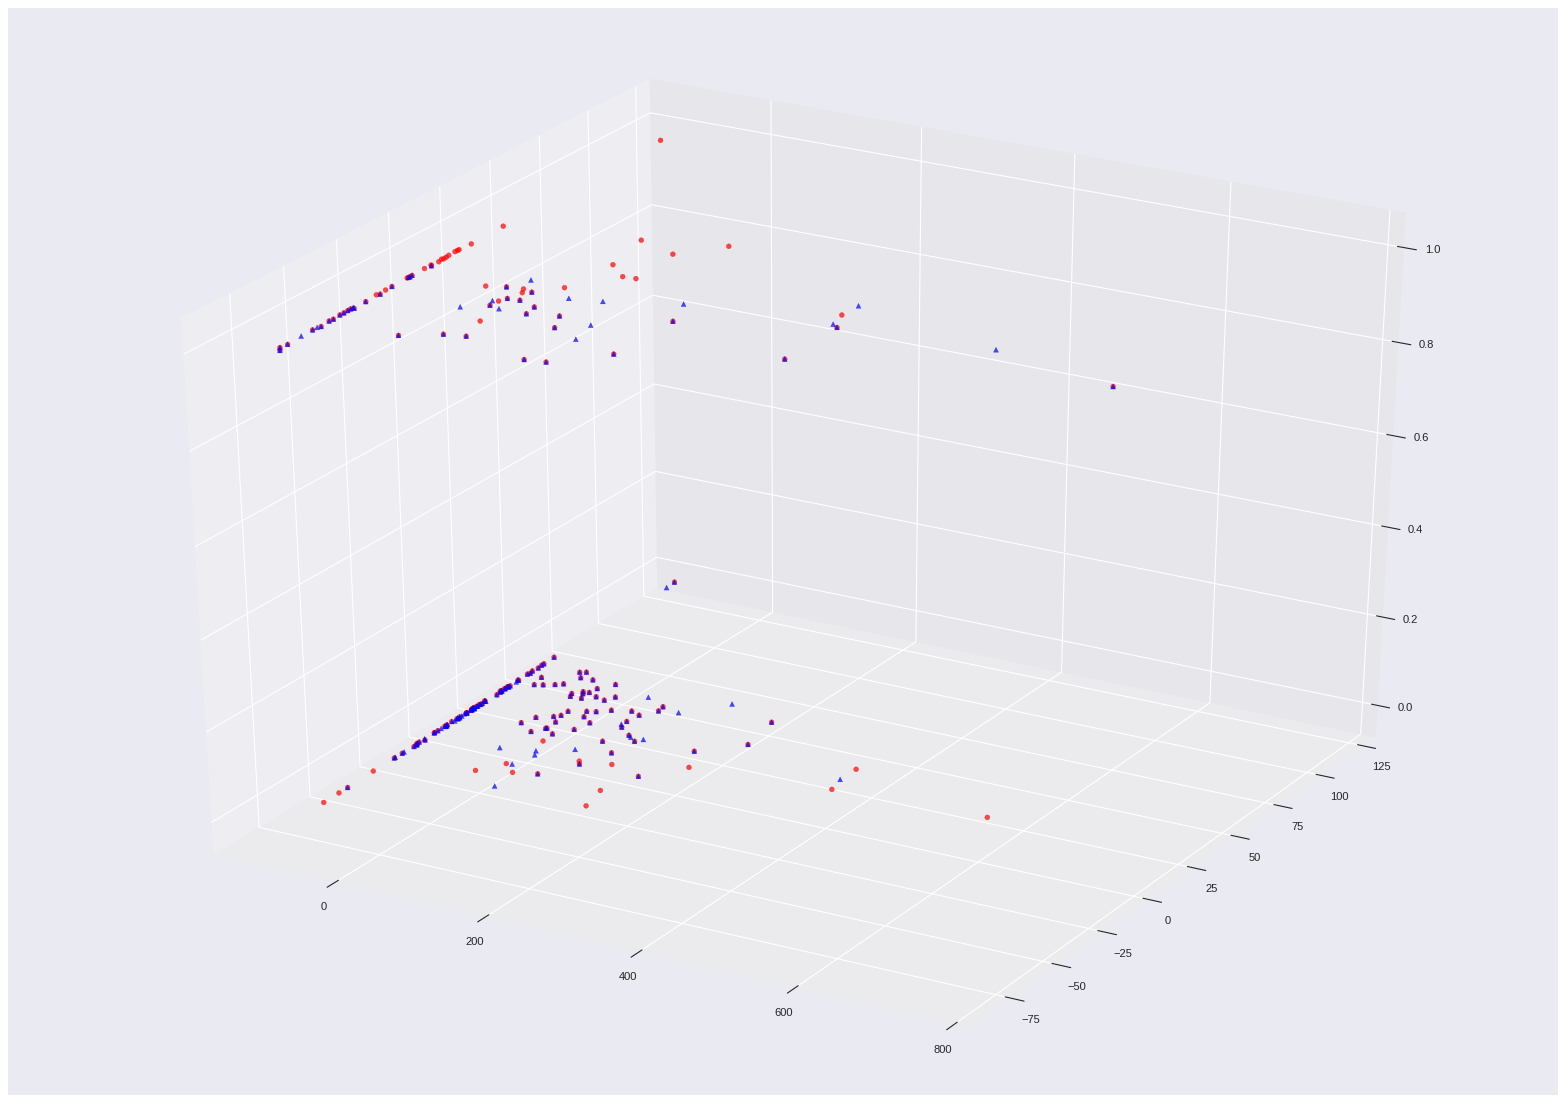

In [37]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(25, 18), dpi=80)
n = 100
ax = fig.add_subplot(111, projection='3d')
xs = principalDf['data1']
ys = principalDf['data2']
zs = y_test
ax.scatter(xs, ys, zs, c="r", alpha = 0.7, marker= "o")
xs = principalDf['data1']
ys = principalDf['data2']
zs = predict
ax.scatter(xs, ys, zs, c="b", alpha = 0.7, marker = '^')
plt.show()

# **Logistic regression in Tensorflow**

This notebook is solution of course : https://github.com/chiphuyen/stanford-tensorflow-tutorials  
Some code is referenced from there

**Vanilla model**

In [0]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time


#parameters

learning_rate = 0.001
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

def vanilla_model(mnist_folder):
  # step 1 : Read data
  tf.reset_default_graph()
  mnist = input_data.read_data_sets(mnist_folder, one_hot=True)
  X_batch , Y_batch = mnist.train.next_batch(batch_size)


  #step 2 : ceate placeholder s
  X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
  Y = tf.placeholder(tf.int32, [batch_size,10], name="label")


  # step 3 : initialize weight and bias
  # weight : initialize weight mean : 0 , std-dev : 0.1
  # tf.random_normal_initializer()
  # bias : 0.0 , tf.zeros_initializer()
  # img = (?,784) * weight = (784,10) = (?,10) + bias (1,10)
  w = tf.get_variable("weight", shape=(784, 10),
                      initializer=tf.random_normal_initializer(mean=0,
                                                               stddev=0.1))
  b = tf.get_variable("bias", shape=(1, 10), initializer=
                      tf.zeros_initializer())


  # step 4: model , logits , model that return logits
  logits = tf.matmul(X, w) + b

  #step 5 : softmax
  entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y ,
                                                    name = "loss")
  loss = tf.reduce_mean(entropy)


  # st
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  preds = tf.nn.softmax(logits)
  correct_pred = tf.equal(tf.argmax(preds,1), tf.argmax(Y,1))
  accuracy = tf.reduce_sum(tf.cast(correct_pred, tf.float32))

  start = time.time()

  writer = tf.summary.FileWriter('./graphs/logreg_placeholder',
                                 tf.get_default_graph())

  with tf.name_scope("summaries_loss"):
      tf.summary.scalar("loss", loss)
      tf.summary.histogram("loss histogram", loss)
      summary_op1 = tf.summary.merge_all()

  with tf.name_scope("summaries_accuracy"):
      tf.summary.scalar("accuracy", accuracy)
      tf.summary.histogram("accuracy histogram", accuracy)
      summary_op2 = tf.summary.merge_all()

  with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      n_batches = int(mnist.train.num_examples/batch_size)
      for i in range(n_epochs):
          total_loss = 0
          for j in range(n_batches):
              X_batch , Y_batch = mnist.train.next_batch(batch_size)
              _, loss_batch, summary = sess.run([optimizer, loss, summary_op1],
                                        feed_dict={X:X_batch, Y:Y_batch})
              total_loss += loss_batch
          writer.add_summary(summary, global_step=i)
          print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
      print('Total time: {0} seconds'.format(time.time() -start))

      total_correct_preds = 0
      n_batches = int(mnist.test.num_examples / batch_size)
      for i in range(n_batches):
          X_batch, Y_batch = mnist.test.next_batch(batch_size)
          accuracy_batch, summary = sess.run([accuracy, summary_op2], feed_dict={
              X:X_batch,Y:Y_batch})
          total_correct_preds +=accuracy_batch
          writer.add_summary(summary, global_step=i)

      print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

      writer.close()


In [73]:
#mnist
vanilla_model('data/mnist')

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Summary name loss histogram is illegal; using loss_histogram instead.
INFO:tensorflow:Summary name accuracy histogram is illegal; using accuracy_histogram instead.
Average loss epoch 0: 0.7447563964170176
Average loss epoch 1: 0.38293971378347536
Average loss epoch 2: 0.3333052603445409
Average loss epoch 3: 0.30943027402693296
Average loss epoch 4: 0.29694550062392977
Average loss epoch 5: 0.2860693953636087
Average loss epoch 6: 0.2794604073246042
Average loss epoch 7: 0.2746426880984873
Average loss epoch 8: 0.270474680011228
Average loss epoch 9: 0.26631432695266527
Average loss epoch 10: 0.2640566843581366
Average loss epoch 11: 0.26075619806498634
Average loss epoch 12: 0.2582138928395885
Average loss epoch 13: 0.256019149505314
Average loss epoch 14: 0.2556865794327987
Ave

![alt text](http://yaroslavvb.com/upload/notMNIST/nmn.png)

In [74]:
#not mnist
vanilla_model('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Summary name loss histogram is illegal; using loss_histogram instead.
INFO:tensorflow:Summary name accuracy histogram is illegal; using accuracy_histogram instead.
Average loss epoch 0: 0.7423672779595657
Average loss epoch 1: 0.380263884375979
Average loss epoch 2: 0.33189708709994675
Average loss epoch 3: 0.30928758279982704
Average loss epoch 4: 0.29621658156384956
Average loss epoch 5: 0.28679996812260233
Average loss epoch 6: 0.2798946531780394
Average loss epoch 7: 0.2743614659859584
Average loss epoch 8: 0.2706448151654019
Average loss epoch 9: 0.2670344883502224
Average loss epoch 10: 0.26435260460787996
Average loss epoch 11: 0.2602632722724012
Average loss epoch 12: 0.26010816476561804
Average loss epoch 13: 0.25632827206230385
Average loss epoch 14: 0.2559235385664693
Average loss epoch 15: 0

The model's ***accuracy*** could be improved by using , one more **hidden layer** and** regularization **

The model's ***time*** could be improved by using **dataset** instead of **placeholder.**

In [0]:
import numpy as np
import os
import urllib
import gzip
import shutil
import struct

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

from matplotlib import pyplot as plt
import tensorflow as tf

def read_birth_life_data(file_name):
    with open(file_name) as f:
        text = f.read().splitlines()[1:]
        data = [line.split('\t') for line in text]
        births = [float(line[1]) for line in data]
        lifes = [float(line[2]) for line in data]
        data = list(zip(births, lifes))
        n_samples = len(data)
        data = np.asarray(data, dtype=np.float32)
    return data, n_samples


def download_one_file(download_url,
                    local_dest,
                    expected_byte=None,
                    unzip_and_remove=False):
    """
    Download the file from download_url into local_dest
    if the file doesn't already exists.
    If expected_byte is provided, check if
    the downloaded file has the same number of bytes.
    If unzip_and_remove is True, unzip the file and remove the zip file
    """
    if os.path.exists(local_dest) or os.path.exists(local_dest[:-3]):
        print('%s already exists' %local_dest)
    else:
        print('Downloading %s' %download_url)
        local_file, _ = urllib.request.urlretrieve(download_url, local_dest)
        file_stat = os.stat(local_dest)
        if expected_byte:
            if file_stat.st_size == expected_byte:
                print('Successfully downloaded %s' %local_dest)
                if unzip_and_remove:
                    with gzip.open(local_dest, 'rb') as f_in, open(local_dest[:-3],'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                    os.remove(local_dest)
            else:
                print('The downloaded file has unexpected number of bytes')

def download_mnist(path):
    """
    Download and unzip the dataset mnist if it's not already downloaded
    Download from http://yann.lecun.com/exdb/mnist
    """
    safe_mkdir(path)
    url = 'http://yann.lecun.com/exdb/mnist'
    filenames = ['train-images-idx3-ubyte.gz',
                'train-labels-idx1-ubyte.gz',
                't10k-images-idx3-ubyte.gz',
                't10k-labels-idx1-ubyte.gz']
    expected_bytes = [9912422, 28881, 1648877, 4542]

    for filename, byte in zip(filenames, expected_bytes):
        download_url = os.path.join(url, filename)
        local_dest = os.path.join(path, filename)
        download_one_file(download_url, local_dest, byte, True)

def safe_mkdir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
        pass


def read_mnist(path, flatten=True, num_train=55000):
    """
    Read in the mnist dataset, given that the data is stored in path
    Return two tuples of numpy arrays
    ((train_imgs, train_labels), (test_imgs, test_labels))
    """
    imgs, labels = parse_data(path, 'train', flatten)
    indices = np.random.permutation(labels.shape[0])
    train_idx, val_idx = indices[:num_train], indices[num_train:]
    train_img, train_labels = imgs[train_idx, :], labels[train_idx, :]
    val_img, val_labels = imgs[val_idx, :], labels[val_idx, :]
    test = parse_data(path, 't10k', flatten)
    return (train_img, train_labels), (val_img, val_labels), test


def get_mnist_dataset(batch_size):
    # Step 1: Read in data
    mnist_folder = 'data/mnist'
    download_mnist(mnist_folder)
    train, val, test = read_mnist(mnist_folder, flatten=False)

    # Step 2: Create datasets and iterator
    train_data = tf.data.Dataset.from_tensor_slices(train)
    train_data = train_data.shuffle(10000) # if you want to shuffle your data
    train_data = train_data.batch(batch_size)

    test_data = tf.data.Dataset.from_tensor_slices(test)
    test_data = test_data.batch(batch_size)

    return train_data, test_data

def parse_data(path, dataset, flatten):
    if dataset != 'train' and dataset != 't10k':
        raise NameError('dataset must be train or t10k')

    label_file = os.path.join(path, dataset + '-labels-idx1-ubyte')
    with open(label_file, 'rb') as file:
        _, num = struct.unpack(">II", file.read(8))
        labels = np.fromfile(file, dtype=np.int8)  # int8
        new_labels = np.zeros((num, 10))
        new_labels[np.arange(num), labels] = 1

    img_file = os.path.join(path, dataset + '-images-idx3-ubyte')
    with open(img_file, 'rb') as file:
        _, num, rows, cols = struct.unpack(">IIII", file.read(16))
        imgs = np.fromfile(file, dtype=np.uint8).reshape(num, rows,
                                                         cols)  # uint8
        imgs = imgs.astype(np.float32) / 255.0
        if flatten:
            imgs = imgs.reshape([num, -1])

    return imgs, new_labels

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    plt.imshow(image, cmap='gray')
    plt.show()

def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [81]:
import tensorflow as tf
tf.reset_default_graph()
import numpy as np
import time
import os

# import utils

#parameters

learning_rate = 0.001
batch_size = 128
n_epochs = 100
n_train = 60000
n_test = 10000
n_nodes = 1024

# step 1 : Read data
mnist_folder = 'data/mnist'
download_mnist(mnist_folder)
train, val, test = read_mnist(mnist_folder, flatten=True)


# step2 : create dataset and iterators
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(1000)
train_data = train_data.batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

# create one iteration and initialize it from different dataset
iterator = tf.data.Iterator.from_structure(train_data.output_types,
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data) # initializer for traindata
test_init = iterator.make_initializer(test_data)  #

# step 3 : initialize weight and bias
# weight : initiali weight mean : 0 , std-dev : 0.1
# tf.random_normal_initializer()
# bias : 0.0 , tf.zeros_initializer()
# img = (?,784) * weight = (784,10) = (?,10) + bias (1,10)
print(img.shape, label.shape)
w1 = tf.get_variable("weight1", shape=(int(img.shape[1]), n_nodes),
                     initializer=tf.random_normal_initializer(mean=0,
                                                              stddev=0.01))
b1 = tf.get_variable("bias1", shape=(1, n_nodes), initializer=
                     tf.zeros_initializer())

w2 = tf.get_variable("weight2", shape=(n_nodes, int(label.shape[1])),
                     initializer=tf.random_normal_initializer(mean=0,
                                                              stddev=0.01))
b2 = tf.get_variable("bias2", shape=(1, int(label.shape[1])), initializer=
                     tf.zeros_initializer())

# step 4: model , logits , model that return logits
logits1 = tf.add(tf.matmul(img, w1), b1)
relu_layer1 = tf.nn.relu(logits1)

logits2 = tf.add(tf.matmul(relu_layer1, w2), b2)
relu_layer2 = tf.nn.relu(logits2)


# step 5 : entropy and loss
entropy1 = tf.nn.softmax_cross_entropy_with_logits_v2(logits=relu_layer2,
                                                      labels=label,
                                                      name="loss")
loss = tf.reduce_mean(entropy1)


# adding regularization
beta = 0.01
regularizer = tf.nn.l2_loss(w2)
loss = tf.reduce_mean(loss + beta * regularizer)



#step 6 : optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss) #


correct_predictions = tf.equal(tf.argmax(relu_layer2, 1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_predictions, tf.float32))


with tf.name_scope("summary_loss"):
    tf.summary.scalar("loss", loss)
    tf.summary.histogram("loss histogram", loss)
    summary_op1 = tf.summary.merge_all()

with tf.name_scope("summary_accuracy"):
    tf.summary.scalar("loss", accuracy)
    tf.summary.histogram("loss histogram", accuracy)
    summary_op2 = tf.summary.merge_all()

writer = tf.summary.FileWriter("./graphs/logdatareg", tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    start_time = time.time()
    for i in range(n_epochs):
        sess.run(train_init)
        total_loss = 0
        n_batches =0
        try:
            while True:
                _, _loss, summary = sess.run([optimizer, loss, summary_op1])
                total_loss +=_loss
                n_batches +=1

        except tf.errors.OutOfRangeError:
            pass
        writer.add_summary(summary, global_step=i)
        print('Average loss epoch {0} : {1}'.format(i, total_loss/n_batches))
    print("total time: {0}".format(time.time() - start_time))

    # for accuracy
    sess.run(test_init)
    total_correct_pred =0
    i = 0
    try:
        while True:
            accuracy_batch, summary = sess.run([accuracy, summary_op2])
            total_correct_pred += accuracy_batch
            i += 1
            writer.add_summary(summary, global_step=i)
    except tf.errors.OutOfRangeError:
        pass
    print("ACCURACY {0} ".format(total_correct_pred/n_test))
    writer.close()



data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists
(?, 784) (?, 10)
INFO:tensorflow:Summary name loss histogram is illegal; using loss_histogram instead.
INFO:tensorflow:Summary name loss histogram is illegal; using loss_histogram instead.
Average loss epoch 0 : 0.638590010307556
Average loss epoch 1 : 0.3971991384098696
Average loss epoch 2 : 0.36030514562545823
Average loss epoch 3 : 0.33893125750297726
Average loss epoch 4 : 0.32456892302563023
Average loss epoch 5 : 0.31363838793233384
Average loss epoch 6 : 0.3043999434557072
Average loss epoch 7 : 0.2972677931536076
Average loss epoch 8 : 0.29257021473590716
Average loss epoch 9 : 0.28704610453095547
Average loss epoch 10 : 0.2815502213530762
Average loss epoch 11 : 0.2783116690987764
Average loss epoch 12 : 0.2745667520997136
Average loss epoch 13 : 0.27110056946443956
Ave

To download the data from mnist , add following link to the curl

http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

In [4]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  96638      0 --:--:-- --:--:-- --:--:-- 96638


unzip it

In [0]:
!gunzip t*-ubyte.gz

In [15]:
!ls

data	     t10k-images-idx3-ubyte  train-images-idx3-ubyte
sample_data  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [0]:
!sudo mkdir data
!sudo mkdir data/mnist

In [0]:
!sudo cp t10k-images-idx3-ubyte ./data/mnist/
!sudo cp t10k-labels-idx1-ubyte ./data/mnist/
!sudo cp train-images-idx3-ubyte ./data/mnist/
!sudo cp train-labels-idx1-ubyte ./data/mnist/

In [26]:
!ls data/mnist

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


In [38]:
!ls sample_data/


anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


# **Not mnist dataset**

https://github.com/davidflanagan/notMNIST-to-MNIST

In [43]:
!curl -O http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  235M  100  235M    0     0  61.2M      0  0:00:03  0:00:03 --:--:-- 61.2M


In [54]:
!curl -O http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8259k  100 8259k    0     0  19.0M      0 --:--:-- --:--:-- --:--:-- 19.0M


In [0]:
!tar -xzf notMNIST_large.tar.gz

In [0]:
!tar -xzf notMNIST_small.tar.gz

In [58]:
!ls

convert_to_mnist_format.py  notMNIST_large.tar.gz  t10k-images-idx3-ubyte
data			    notMNIST_mall.tar.gz   t10k-labels-idx1-ubyte
diabetes.csv		    notMNIST_small	   train-images-idx3-ubyte
graphs			    notMNIST_small.tar.gz  train-labels-idx1-ubyte
notMNIST_large		    sample_data


In [57]:
!curl -O https://raw.githubusercontent.com/davidflanagan/notMNIST-to-MNIST/master/convert_to_mnist_format.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4149  100  4149    0     0  23050      0 --:--:-- --:--:-- --:--:-- 23178


In [60]:
!python3 convert_to_mnist_format.py notMNIST_large 6000 data/train-labels-idx1-byte data/train-images-idx3-ubyte

file notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png is empty
file notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png is empty
file notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png is empty
file notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png is empty
99% complete



In [62]:
!ls data/


mnist  train-images-idx3-ubyte	train-labels-idx1-byte


More information on Non mnist # **http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html**